In [1]:
import pandas as pd
import numpy as np
import scipy as sp
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Problem 6.4

We are given that *n=5* 

We first find the grand average, $ \overline{\overline{X}}$ using the formula as below:
$$ \overline{\overline{X}} = \frac{\sum_{i=1}^{k}\overline{X_i}}{k}$$

Then we find the average of the sample ranges $ \overline{R} $, using the formula as below:
$$ \overline{R} = \frac{\sum_{i=1}^{k}{R_i}}{k} $$


In [2]:
# First we load the CSV file with the data of Problem 6.4
df_glove = pd.read_csv('Glove_Box.csv')
# Now we need the first 25 samples to create the Control charts so we have
df_head = df_glove.head(25)
df_tail = df_glove.tail(5)
X_grand_average = df_head.Xbar.mean()
R_average = df_head.Range.mean()
print 'Grand Average of X_bar is ',X_grand_average, ' and Average of the Sample ranges is ',R_average

Grand Average of X_bar is  0.4378  and Average of the Sample ranges is  0.0122


For our problem here we have *n=5* which gives us $ A_2 = 0.577 $, $ D_3 = 0 $
and $ D_4 = 2.115 $ <br> <br>
Now to Calculate UCL and LCL of $ \overline{X_i} $ Control chart we use formulas:
$$ LCL = \overline{\overline{X}} - A_2 \overline{R} $$
$$ UCL = \overline{\overline{X}} + A_2 \overline{R} $$<br><br>
And for calculating UCL and LCL of R Control Chart we use formulas:
$$ LCL = D_3 \overline{R} $$
$$ UCL = D_4 \overline{R} $$

In [3]:
A2 = 0.577
D3 = 0
D4 = 2.115
# For Xbar Control Chart we have
LCL_X = X_grand_average - (A2*R_average)
UCL_X = X_grand_average + (A2*R_average)
# For R control Chart we have 
LCL_R = D3*R_average
UCL_R = D4*R_average
print 'LCL for Xbar Control chart is ',LCL_X, 'and UCL is ',UCL_X
print 'LCL for R Control chart is ',LCL_R, 'and UCL is ',UCL_R

LCL for Xbar Control chart is  0.4307606 and UCL is  0.4448394
LCL for R Control chart is  0.0 and UCL is  0.025803


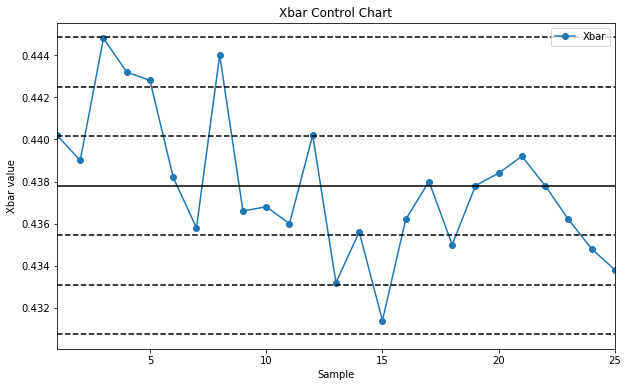

In [4]:
# Now Plotting the Xbar Control Chart to check if the process is in control
interval = (UCL_X - X_grand_average) / 3.0
df_head.plot(x='Sample', y='Xbar', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_X, LCL_X], 'k--')
plt.plot([1, 30], [UCL_X, UCL_X], 'k--')
plt.plot([1, 30], [UCL_X - interval , UCL_X - interval], 'k--')
plt.plot([1, 30], [UCL_X - (2*interval) , UCL_X - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_X + (2*interval) , LCL_X + (2*interval)], 'k--')
plt.plot([1, 30], [LCL_X + interval , LCL_X + interval], 'k--')
plt.plot([1, 30], [X_grand_average, X_grand_average], 'k-')
plt.ylabel("Xbar value")
plt.title("Xbar Control Chart")

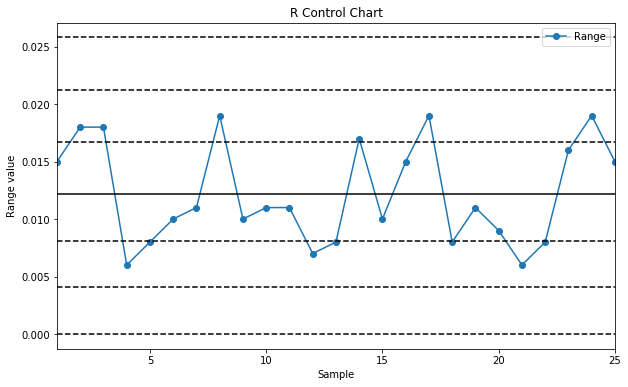

In [5]:
# Now Plotting the R Control Chart to check if the process is in control
interval = (UCL_R - R_average) / 3.0
interval2 = (R_average - LCL_R ) /3.0
df_head.plot(x='Sample', y='Range', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_R, LCL_R], 'k--')
plt.plot([1, 30], [UCL_R, UCL_R], 'k--')
plt.plot([1, 30], [UCL_R - interval , UCL_R - interval], 'k--')
plt.plot([1, 30], [UCL_R - (2*interval) , UCL_R - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_R + interval2 , LCL_R + interval2], 'k--')
plt.plot([1, 30], [LCL_R + (2*interval2) , LCL_R + (2*interval2)], 'k--')
plt.plot([1, 30], [R_average, R_average], 'k-')
plt.ylabel("Range value")
plt.title("R Control Chart")

As we can see that for Xbar Control Chart there are points mainly samples 3,4 and 5 which are consecutive and are within the Zone A so we can as per Test 2 this signals the presence of an out-of-control condition so we need not plot the remaining 5 samples

### Problem 5


Here we 40 samples each of size 5. So first we calculate Average for each sample $ \overline{X_i} $ using formula:
$$ \overline{X_i} = \frac{\sum_{j=1}^{n}{X_{ij}}}{n} $$
and Range $ R_i $ using the formula
$$ R_i = X_{i,largest} - X_{i,smallest} $$

In [6]:
df_forty = pd.read_csv('Problem5.csv')
df_forty_head = df_forty.head(20)
df_forty_tail = df_forty.tail(20)
# Finding the Average for each sample and naming it as column Xbar
df_forty_head['Xbar']= df_forty_head[['X1','X2','X3','X4','X5']].mean(axis=1)
# Finding the Range for each sample and naming it as column Range
df_forty_head['Range'] = df_forty_head[['X1','X2','X3','X4','X5']].max(axis=1) - \
df_forty_head[['X1','X2','X3','X4','X5']].min(axis=1)

Now we calculate the  grand average, $ \overline{\overline{X}}$ using the formula as below:
$$ \overline{\overline{X}} = \frac{\sum_{i=1}^{k}\overline{X_i}}{k}$$

Then we find the average of the sample ranges $ \overline{R} $, using the formula as below:
$$ \overline{R} = \frac{\sum_{i=1}^{k}{R_i}}{k} $$


In [7]:
X_grand_ave = df_forty_head.Xbar.mean()
R_ave = df_forty_head.Range.mean()
print 'Grand Average of X_bar is ',X_grand_ave, ' and Average of the Sample ranges is ',R_ave

Grand Average of X_bar is  10.0615426687  and Average of the Sample ranges is  1.3937375888


For our problem here we have *n=5* which gives us $ A_2 = 0.577 $, $ D_3 = 0 $
and $ D_4 = 2.115 $ <br> <br>
Now to Calculate UCL and LCL of $ \overline{X_i} $ Control chart we use formulas:
$$ LCL = \overline{\overline{X}} - A_2 \overline{R} $$
$$ UCL = \overline{\overline{X}} + A_2 \overline{R} $$<br><br>
And for calculating UCL and LCL of R Control Chart we use formulas:
$$ LCL = D_3 \overline{R} $$
$$ UCL = D_4 \overline{R} $$

In [8]:
A2 = 0.577
D3 = 0
D4 = 2.115
# For Xbar Control Chart we have
LCL_Xbar = X_grand_ave - (A2*R_ave)
UCL_Xbar = X_grand_ave + (A2*R_ave)
# For R control Chart we have 
LCL_Range = D3*R_ave
UCL_Range = D4*R_ave
print 'LCL for Xbar Control chart is ',LCL_Xbar, 'and UCL is ',UCL_Xbar
print 'LCL for R Control chart is ',LCL_Range, 'and UCL is ',UCL_Range

LCL for Xbar Control chart is  9.25735607994 and UCL is  10.8657292574
LCL for R Control chart is  0.0 and UCL is  2.94775500031


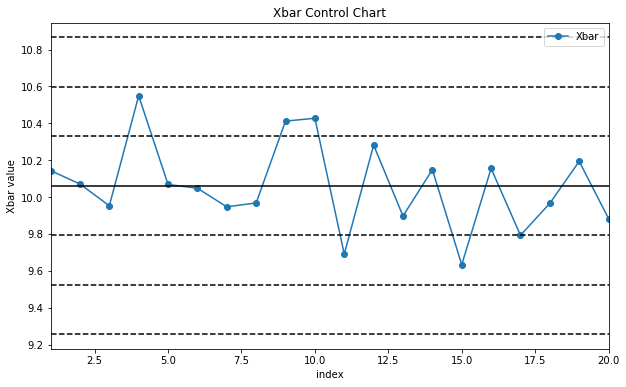

In [9]:
# Now Plotting the Xbar Control Chart for the first 20 samples 
interval = (UCL_Xbar - X_grand_ave) / 3.0
df_forty_head.plot(x='index', y='Xbar', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_Xbar, LCL_Xbar], 'k--')
plt.plot([1, 30], [UCL_Xbar, UCL_Xbar], 'k--')
plt.plot([1, 30], [UCL_Xbar - interval , UCL_Xbar - interval], 'k--')
plt.plot([1, 30], [UCL_Xbar - (2*interval) , UCL_Xbar - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Xbar + (2*interval) , LCL_Xbar + (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Xbar + interval , LCL_Xbar + interval], 'k--')
plt.plot([1, 30], [X_grand_ave, X_grand_ave], 'k-')
plt.ylabel("Xbar value")
plt.title("Xbar Control Chart")

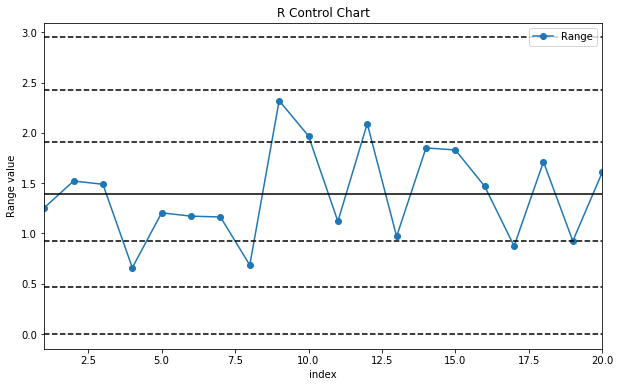

In [10]:
# Now Plotting the R Control Chart for the first 20 samples
interval = (UCL_Range - R_ave) / 3.0
interval2 = (R_ave - LCL_Range ) /3.0
df_forty_head.plot(x='index', y='Range', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_Range, LCL_Range], 'k--')
plt.plot([1, 30], [UCL_Range, UCL_Range], 'k--')
plt.plot([1, 30], [UCL_Range - interval , UCL_Range - interval], 'k--')
plt.plot([1, 30], [UCL_Range - (2*interval) , UCL_Range - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Range + interval2 , LCL_Range + interval2], 'k--')
plt.plot([1, 30], [LCL_Range + (2*interval2) , LCL_Range + (2*interval2)], 'k--')
plt.plot([1, 30], [R_ave, R_ave], 'k-')
plt.ylabel("Range value")
plt.title("R Control Chart")

From the first 20 samples $ \overline{X} $ and $ R $ Control charts we see that the process is in Control
<br><br>
Now we calculate Sample Average for the remaining 20 samples <br>
and also Range for each sample

In [11]:
# Finding the Average for each sample and naming it as column Xbar
df_forty_tail['Xbar']= df_forty_tail[['X1','X2','X3','X4','X5']].mean(axis=1)
# Finding the Range for each sample and naming it as column Range
df_forty_tail['Range'] = df_forty_tail[['X1','X2','X3','X4','X5']].max(axis=1) - \
df_forty_tail[['X1','X2','X3','X4','X5']].min(axis=1)
df_forty_tail['index']=df_forty_tail['index']-20

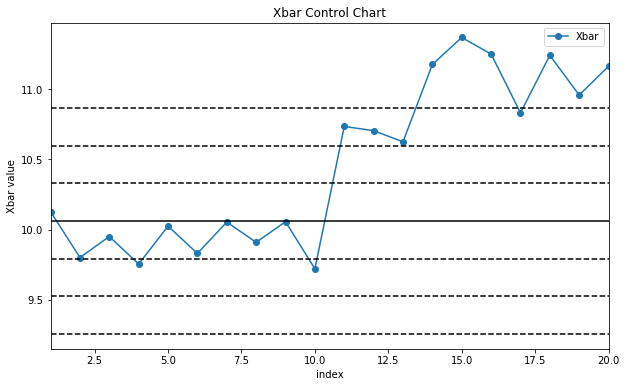

In [12]:
# Now Plotting the Xbar Control Chart for the remaining 20 samples using the same CL as for first
interval = (UCL_Xbar - X_grand_ave) / 3.0
df_forty_tail.plot(x='index', y='Xbar', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_Xbar, LCL_Xbar], 'k--')
plt.plot([1, 30], [UCL_Xbar, UCL_Xbar], 'k--')
plt.plot([1, 30], [UCL_Xbar - interval , UCL_Xbar - interval], 'k--')
plt.plot([1, 30], [UCL_Xbar - (2*interval) , UCL_Xbar - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Xbar + (2*interval) , LCL_Xbar + (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Xbar + interval , LCL_Xbar + interval], 'k--')
plt.plot([1, 30], [X_grand_ave, X_grand_ave], 'k-')
plt.ylabel("Xbar value")
plt.title("Xbar Control Chart")

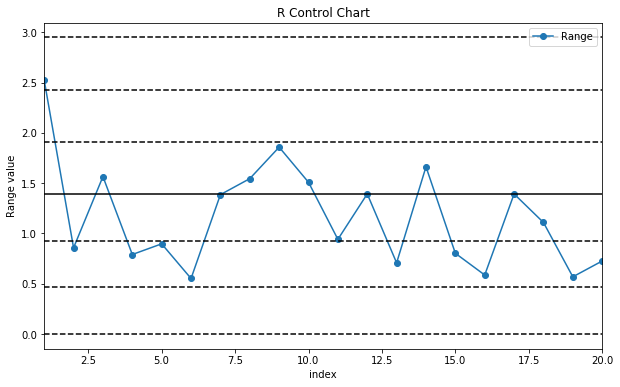

In [13]:
# Now Plotting the R Control Chart of the remaining 20 samples using the same CL as for first 20
interval = (UCL_Range - R_ave) / 3.0
interval2 = (R_ave - LCL_Range ) /3.0
df_forty_tail.plot(x='index', y='Range', style='-o',figsize=(10,6))
plt.plot([1, 30], [LCL_Range, LCL_Range], 'k--')
plt.plot([1, 30], [UCL_Range, UCL_Range], 'k--')
plt.plot([1, 30], [UCL_Range - interval , UCL_Range - interval], 'k--')
plt.plot([1, 30], [UCL_Range - (2*interval) , UCL_Range - (2*interval)], 'k--')
plt.plot([1, 30], [LCL_Range + interval2 , LCL_Range + interval2], 'k--')
plt.plot([1, 30], [LCL_Range + (2*interval2) , LCL_Range + (2*interval2)], 'k--')
plt.plot([1, 30], [R_ave, R_ave], 'k-')
plt.ylabel("Range value")
plt.title("R Control Chart")

As we can see from the $ \overline{X} $ Control of the remaining 20 samples some points lie outside the CL so
we say that the process is not in control